![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Phân tích dữ liệu.


In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud
%pip install plotly
%pip install ipykernel
%pip install nbformat 

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import datetime

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Đọc file Csv


In [5]:
df = pd.read_csv(
    'yeuusuk.csv'
)

# Tổng quan về dữ liệu thu thập


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          95 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [7]:
print(f"Love_USUK rows: {df.iloc[:, 0]}, Columns: {df.shape[1]}")


Love_USUK rows: 0     747839004050965
1     747186554116210
2     746684997499699
3     745882380913294
4     745879927580206
           ...       
95    705491651619034
96    705376224963910
97    705374204964112
98    704816088353257
99    704808921687307
Name: post_id, Length: 100, dtype: int64, Columns: 51



# Lượt reaction theo thời gian đăng bài

In [8]:
df[['time','timestamp' ,'reaction_count']]

,time,timestamp,reaction_count
0,2023-11-30 15:09:54,1701331794,1631
1,2023-11-29 08:38:44,1701221924,996
2,2023-11-28 09:12:34,1701137554,4025
3,2023-11-26 21:05:58,1701007558,1884
4,2023-11-26 20:59:52,1701007192,1048
...,...,...,...
95,2023-09-15 17:30:47,1694773847,279
96,2023-09-15 13:16:20,1694758580,2033
97,2023-09-15 13:10:37,1694758237,3344
98,2023-09-14 13:53:03,1694674383,670


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# The chart shows the reaction performance of posts over time

In [9]:
average_reactions = df['reaction_count'].mean()
print(average_reactions)

2066.46


In [10]:
df['time'] = pd.to_datetime(df['time'])


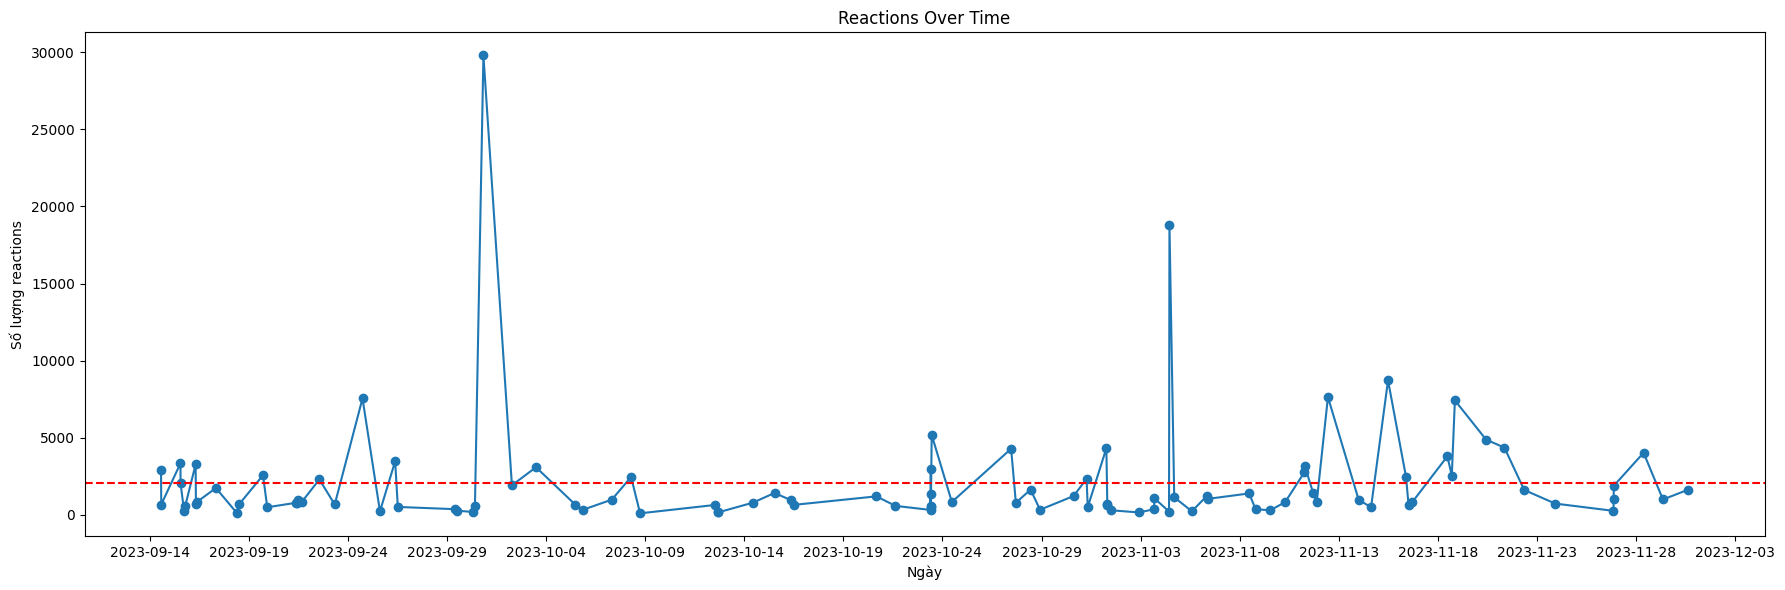

In [11]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
dates = df['time'].to_list()
y = df['reaction_count'].to_list()

plt.figure(figsize=(18, 6))
plt.plot_date(dates, y, linestyle='solid')
plt.gca().xaxis.set_major_locator(DayLocator(interval= 5)) 
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.axhline(y=average_reactions, color='r', linestyle='--', label='Average Reactions')
plt.xlabel('Ngày')
plt.ylabel('Số lượng reactions')
plt.title('Reactions Over Time')
plt.tight_layout()

plt.show()


Với giá trị lượt reactions trung bình là khoảng 2000. Dựa vào biểu đồ trên, xu hướng của kênh sẽ giao động khoảng trung bình và sẽ bùng nổ vào 1 số sự kiện đặc biệt.

Ngày 30-09-2023 có một sự kiện bùng nổ là bức chụp có 4 nữ diên viên trong làng giải trí Hollywood

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Chia cột 'reactions' thành những cột riêng.


In [12]:
import pandas as pd
df_reactions = df['reactions'].apply(eval).apply(pd.Series)
merged_df = pd.merge(df, df_reactions, left_index=True, right_index=True)



In [13]:
merged_df_copy = merged_df.copy()

In [14]:
del_cols = ["shared_text", "original_text", "timestamp", "video_size_MB", "image", "image_lowquality", "images", "images_description", "images_lowquality", "images_lowquality_description", "video", "video_duration_seconds", "video_height", "video_id", "video_quality", "video_thumbnail", "video_watches", "video_width", "post_url", "link", "links", "user_id", "username", "user_url", "is_live", "factcheck", "shared_post_id", "shared_time", "shared_user_id", "shared_username", "shared_post_url", "available", "reactors", "w3_fb_url", "with", "page_id", "sharers", "image_id", "image_ids", "was_live"]

In [15]:
merged_df.drop(del_cols, axis=1, inplace=True)

In [16]:
merged_df

,post_id,text,post_text,time,likes,comments,shares,comments_full,reactions,reaction_count,fetched_time,thích,yêu thích,haha,wow,thương thương,buồn,phẫn nộ
0,747839004050965,LẦN ĐẦU TIÊN MAROON 5 TỚI THĂM VIỆT NAM 😍\n\nG...,LẦN ĐẦU TIÊN MAROON 5 TỚI THĂM VIỆT NAM 😍\n\nG...,2023-11-30 15:09:54,NaN,168,38,"[{'comment_id': '368325572427024', 'comment_ur...","{'thích': 472, 'yêu thích': 21, 'haha': 910, '...",1631,2023-11-30 17:59:42.564496,472.0,21.0,910.0,6.0,1.0,221.0,NaN
1,747186554116210,❗Charli XCX xác nhận đính hôn với thành viên G...,❗Charli XCX xác nhận đính hôn với thành viên G...,2023-11-29 08:38:44,NaN,6,2,"[{'comment_id': '722064739821622', 'comment_ur...","{'thích': 845, 'yêu thích': 135, 'haha': 3, 'w...",996,2023-11-30 18:00:01.289731,845.0,135.0,3.0,5.0,5.0,3.0,NaN
2,746684997499699,"❗Một Giám mục Công Giáo, người đã cho phép Sab...","❗Một Giám mục Công Giáo, người đã cho phép Sab...",2023-11-28 09:12:34,NaN,134,56,"[{'comment_id': '1461920737982701', 'comment_u...","{'thích': 2846, 'yêu thích': 27, 'haha': 678, ...",4025,2023-11-30 18:00:27.495650,2846.0,27.0,678.0,16.0,1.0,393.0,64.0
3,745882380913294,CÂU CHUYỆN DEMI LOVATO & GÀ TÂY\n\nLời chia sẻ...,CÂU CHUYỆN DEMI LOVATO & GÀ TÂY\n\nLời chia sẻ...,2023-11-26 21:05:58,NaN,45,13,"[{'comment_id': '729874898629578', 'comment_ur...","{'thích': 876, 'yêu thích': 7, 'haha': 965, 'w...",1884,2023-11-30 18:00:50.080930,876.0,7.0,965.0,1.0,4.0,31.0,NaN
4,745879927580206,❗Beyoncé xuất hiện tại thảm đỏ Renaissance Fil...,❗Beyoncé xuất hiện tại thảm đỏ Renaissance Fil...,2023-11-26 20:59:52,NaN,11,3,"[{'comment_id': '1297179080840531', 'comment_u...","{'thích': 851, 'yêu thích': 181, 'haha': 2, 'w...",1048,2023-11-30 18:01:05.997646,851.0,181.0,2.0,7.0,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,705491651619034,❗Doja Cat selfie với phiên bản Ma-la-canh giốn...,❗Doja Cat selfie với phiên bản Ma-la-canh giốn...,2023-09-15 17:30:47,NaN,8,0,"[{'comment_id': '1269268360453442', 'comment_u...","{'thích': 195, 'yêu thích': 3, 'haha': 58, 'wo...",279,2023-11-30 18:22:34.634100,195.0,3.0,58.0,1.0,1.0,21.0,NaN
96,705376224963910,< CÓ THỂ BẠN CHƯA BIẾT >\n\n❗Amber Heard và El...,< CÓ THỂ BẠN CHƯA BIẾT >\n\n❗Amber Heard và El...,2023-09-15 13:16:20,NaN,30,5,"[{'comment_id': '218432547615942', 'comment_ur...","{'thích': 1663, 'yêu thích': 18, 'haha': 330, ...",2033,2023-11-30 18:22:41.719502,1663.0,18.0,330.0,10.0,1.0,11.0,NaN
97,705374204964112,❗ELON MUSK ĐĂNG ẢNH NYC AMBER HEARD COSPLAY CH...,❗ELON MUSK ĐĂNG ẢNH NYC AMBER HEARD COSPLAY CH...,2023-09-15 13:10:37,NaN,54,12,"[{'comment_id': '758961622701547', 'comment_ur...","{'thích': 2381, 'yêu thích': 32, 'haha': 870, ...",3344,2023-11-30 18:22:53.533339,2381.0,32.0,870.0,9.0,4.0,46.0,2.0
98,704816088353257,❗Billboard liệt kê Miley Cyrus vào danh sách n...,❗Billboard liệt kê Miley Cyrus vào danh sách n...,2023-09-14 13:53:03,NaN,22,2,"[{'comment_id': '869597251229784', 'comment_ur...","{'thích': 520, 'yêu thích': 5, 'haha': 10, 'bu...",670,2023-11-30 18:23:11.314485,520.0,5.0,10.0,NaN,NaN,134.0,1.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Reaction classification chart

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15392\3215032407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loại reactions', y='Tổng số lượt', data=total_reactions, palette='viridis')


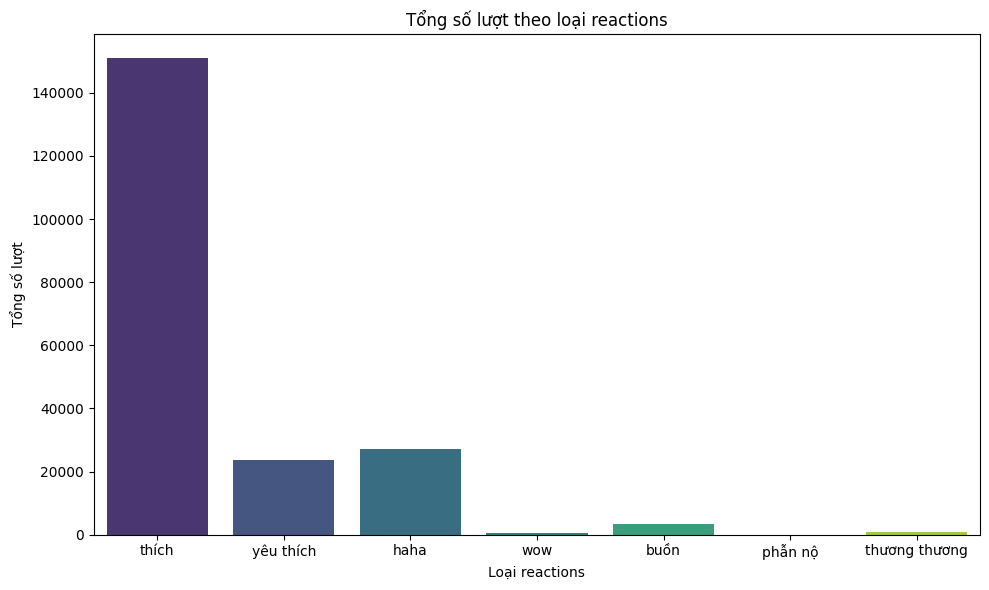

In [17]:
total_reactions = merged_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].sum().reset_index()
total_reactions.columns = ['Loại reactions', 'Tổng số lượt']
plt.figure(figsize=(10, 6))
sns.barplot(x='Loại reactions', y='Tổng số lượt', data=total_reactions, palette='viridis')
plt.xlabel('Loại reactions')
plt.ylabel('Tổng số lượt')
plt.title('Tổng số lượt theo loại reactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
total_reactions = merged_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].sum().reset_index()
total_reactions.columns = ['Loại reactions', 'Tổng số lượt']
fig = px.pie(names=total_reactions['Loại reactions'][1:],
             values=total_reactions['Tổng số lượt'][1:],
             hole=0.6, width=1000, height=600)

fig.show()

Lượt likes và loves của page khá gần nhau và vượt trội so với những cảm xúc khác. Mọi người có vẻ đều rất thích mỗi khi một nghệ sĩ được nhắc đến.

In [19]:
import pandas as pd
import plotly.express as px
merged_df['hour'] = merged_df['time'].dt.hour
reactions_by_hour = merged_df.groupby('hour')[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].sum()
reactions_by_hour = reactions_by_hour.reset_index().melt(id_vars='hour', var_name='Loại reactions', value_name='Tổng số lượt')
fig = px.line(reactions_by_hour, x='hour', y='Tổng số lượt', color='Loại reactions',
              title='Số lượt reactions trong từng khoảng thời gian trong 1 ngày',
              labels={'hour': 'Giờ', 'Tổng số lượt': 'Tổng số lượt reactions'})
fig.show()


10h sáng và 10h tối là khoảng thơì điểm mà mọi người sẽ react nhiều nhất. Vậy nên page cần đăng những thông tin quan trọng và nóng hổi nhất vào thời gian này.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Mối quan hệ giữa lượt share và lượt reactions

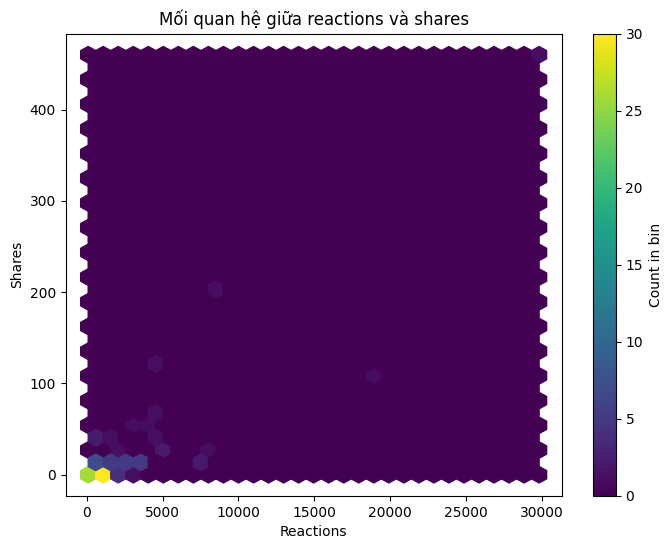

In [20]:
import matplotlib.pyplot as plt
reactions = df['reaction_count']
shares = df['shares']
plt.figure(figsize=(8, 6))
plt.hexbin(reactions, shares, gridsize=30, cmap='viridis')  
plt.colorbar(label='Count in bin')
plt.title('Mối quan hệ giữa reactions và shares')  
plt.xlabel('Reactions') 
plt.ylabel('Shares') 

plt.show()


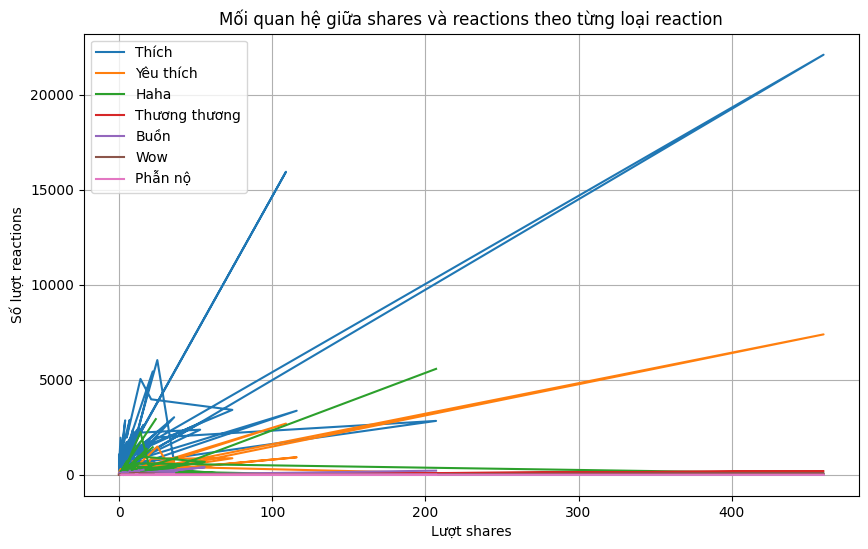

In [21]:
import matplotlib.pyplot as plt
categories = ['Thích', 'Yêu thích', 'Haha', 'Thương thương', 'Buồn', 'Wow', 'Phẫn nộ']
values_reactions = [merged_df['thích'], merged_df['yêu thích'], merged_df['haha'],
                    merged_df['thương thương'], merged_df['buồn'], merged_df['wow'], merged_df['phẫn nộ']]
values_shares = merged_df['shares']
plt.figure(figsize=(10, 6))
for i, reaction in enumerate(categories):
    plt.plot(values_shares, values_reactions[i], label=reaction)
plt.xlabel('Lượt shares')
plt.ylabel('Số lượt reactions')
plt.title('Mối quan hệ giữa shares và reactions theo từng loại reaction')
plt.legend()
plt.grid(True)

plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Biểu đồ reactions theo ngày.


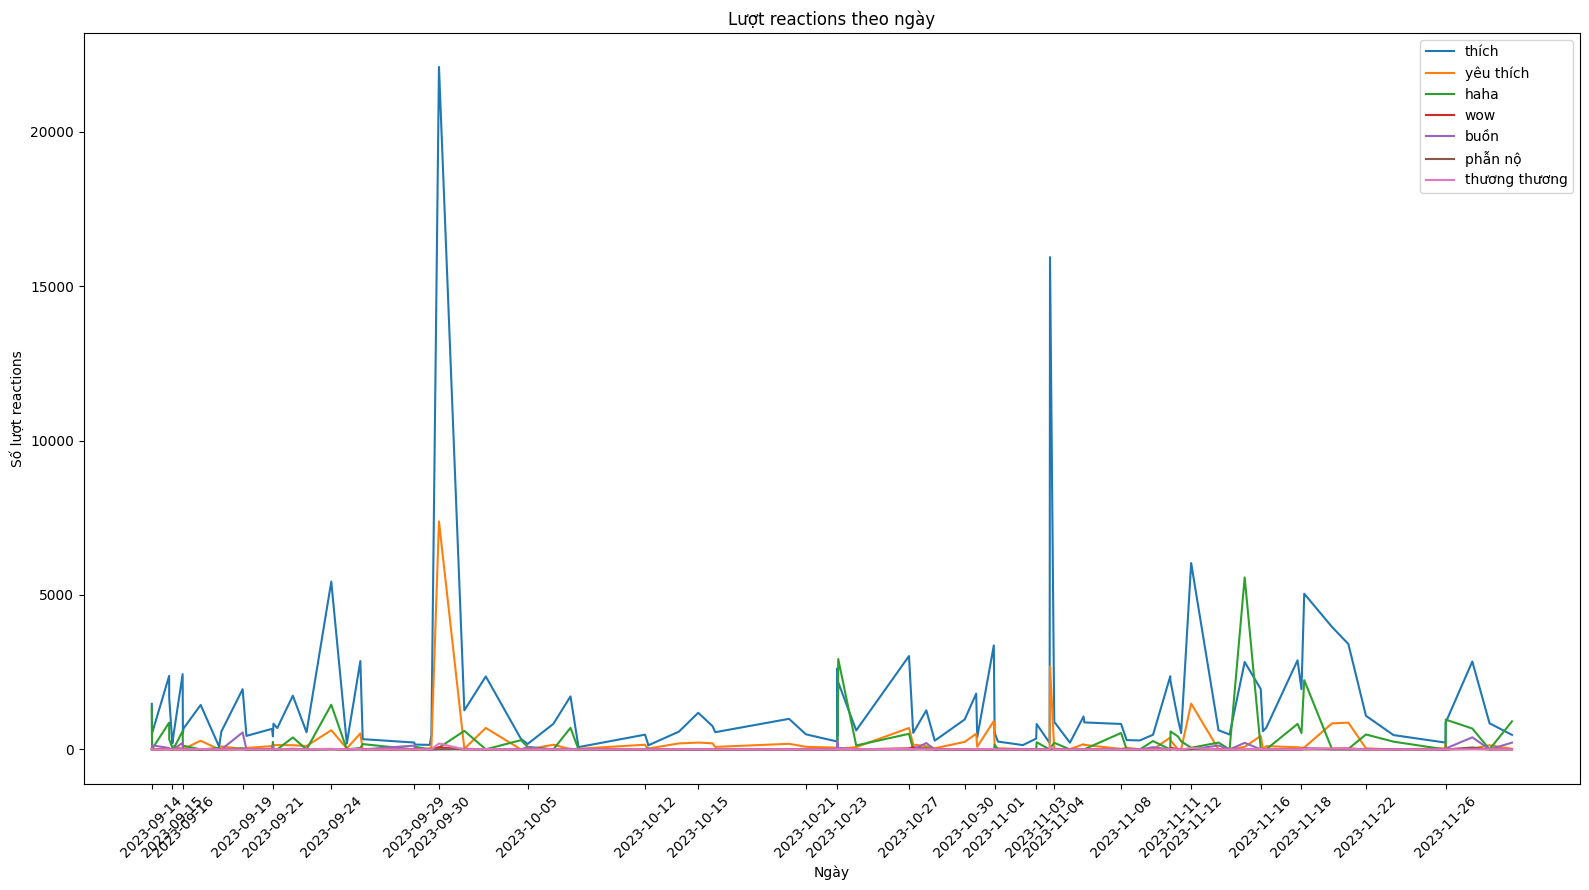

In [22]:
reactions_by_date = merged_df.groupby('time')[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].sum()
plt.figure(figsize=(16, 9))
for column in reactions_by_date.columns:
    plt.plot(reactions_by_date.index, reactions_by_date[column], label=column)
plt.xlabel('Ngày')
plt.ylabel('Số lượt reactions')
plt.title('Lượt reactions theo ngày')
plt.legend()
plt.xticks(rotation=45)
plt.xticks(reactions_by_date.index[::4])
plt.tight_layout()
plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Đọc tất cả bài post

In [23]:
df = pd.DataFrame(df)
df_text = df[['post_id', 'post_text']]
text = str(df_text['post_text'])
print(text)


0     LẦN ĐẦU TIÊN MAROON 5 TỚI THĂM VIỆT NAM 😍\n\nG...
1     ❗Charli XCX xác nhận đính hôn với thành viên G...
2     ❗Một Giám mục Công Giáo, người đã cho phép Sab...
3     CÂU CHUYỆN DEMI LOVATO & GÀ TÂY\n\nLời chia sẻ...
4     ❗Beyoncé xuất hiện tại thảm đỏ Renaissance Fil...
                            ...                        
95    ❗Doja Cat selfie với phiên bản Ma-la-canh giốn...
96    < CÓ THỂ BẠN CHƯA BIẾT >\n\n❗Amber Heard và El...
97    ❗ELON MUSK ĐĂNG ẢNH NYC AMBER HEARD COSPLAY CH...
98    ❗Billboard liệt kê Miley Cyrus vào danh sách n...
99    "Chết tiệt, tui không biết tui b.ự đến vậy lun...
Name: post_text, Length: 100, dtype: object


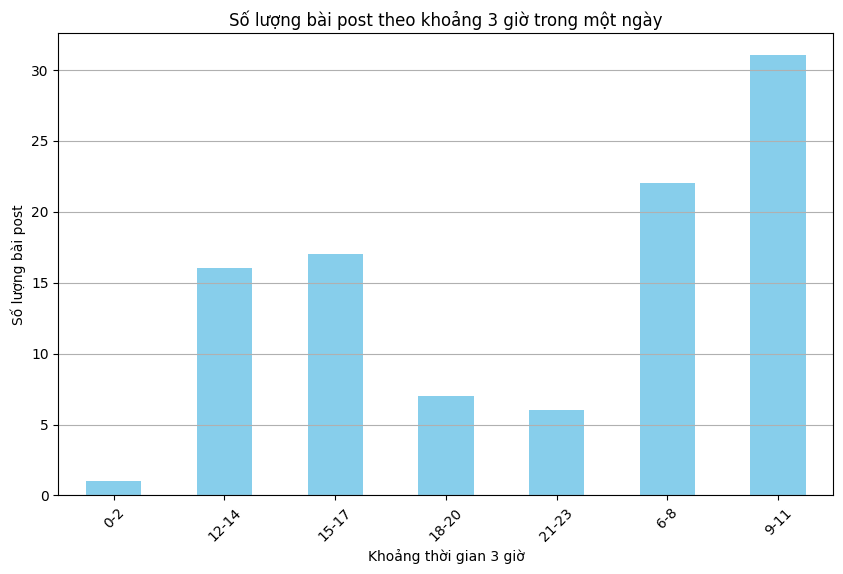

In [24]:
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df['hour'] = merged_df['time'].dt.hour
merged_df['3_hour_interval'] = ((merged_df['hour'] // 3) * 3).astype(str) + '-' + ((merged_df['hour'] // 3) * 3 + 2).astype(str)
posts_by_3_hour_interval = merged_df.groupby('3_hour_interval').size()
plt.figure(figsize=(10, 6))
posts_by_3_hour_interval.plot(kind='bar', color='skyblue')
plt.title('Số lượng bài post theo khoảng 3 giờ trong một ngày')
plt.xlabel('Khoảng thời gian 3 giờ')
plt.ylabel('Số lượng bài post')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Page chủ yếu hoạt động vào trưa và tối. Tầm giờ hoạt động mạnh nhất kà từ 9-11h. Rõ ràng là một page hướng đến giới trẻ.


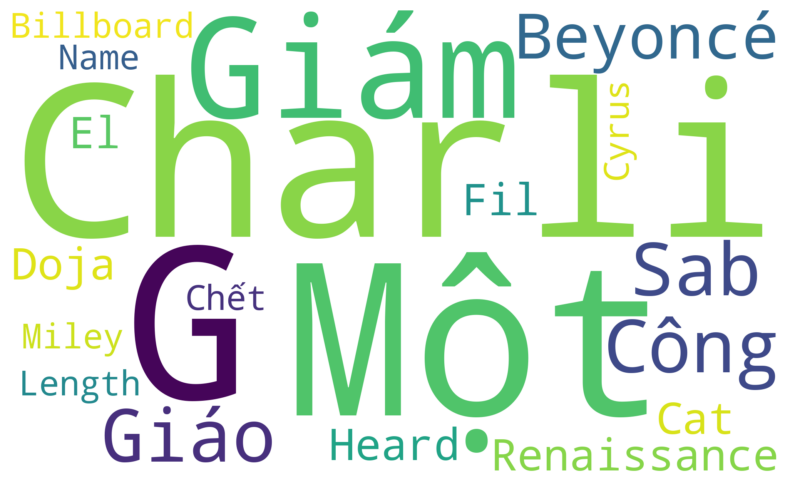

In [25]:
from wordcloud import WordCloud, STOPWORDS
def loc_ten_nguoi_noi_tieng(text):
    words = text.split()
    filtered_words = [word for word in words if word.istitle()]
    return filtered_words

filtered_names = loc_ten_nguoi_noi_tieng(text)
filtered_text = ' '.join(filtered_names)

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                     ).generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Một số nghệ sĩ nổi bật thường được nhắc tới.

In [26]:
max_reactions_post = merged_df[merged_df['reaction_count'] == merged_df['reaction_count'].max()]
max_reactions_post


,post_id,text,post_text,time,likes,comments,shares,comments_full,reactions,reaction_count,fetched_time,thích,yêu thích,haha,wow,thương thương,buồn,phẫn nộ,hour,3_hour_interval
71,714422660725933,❗TỨ ĐẠI MỸ NHÂN LÀNG PHIM HOLLYWOOD❤️\n\n✨Jenn...,❗TỨ ĐẠI MỸ NHÂN LÀNG PHIM HOLLYWOOD❤️\n\n✨Jenn...,2023-09-30 20:04:25,NaN,1041,460,"[{'comment_id': '3204184899876324', 'comment_u...","{'thích': 22093, 'yêu thích': 7383, 'haha': 59...",29807,2023-11-30 18:17:37.364090,22093.0,7383.0,59.0,72.0,193.0,6.0,1.0,20,18-20


In [27]:
max_shares_post = merged_df[merged_df['shares'] == merged_df['shares'].max()]
max_reactions_post


,post_id,text,post_text,time,likes,comments,shares,comments_full,reactions,reaction_count,fetched_time,thích,yêu thích,haha,wow,thương thương,buồn,phẫn nộ,hour,3_hour_interval
71,714422660725933,❗TỨ ĐẠI MỸ NHÂN LÀNG PHIM HOLLYWOOD❤️\n\n✨Jenn...,❗TỨ ĐẠI MỸ NHÂN LÀNG PHIM HOLLYWOOD❤️\n\n✨Jenn...,2023-09-30 20:04:25,NaN,1041,460,"[{'comment_id': '3204184899876324', 'comment_u...","{'thích': 22093, 'yêu thích': 7383, 'haha': 59...",29807,2023-11-30 18:17:37.364090,22093.0,7383.0,59.0,72.0,193.0,6.0,1.0,20,18-20


In [28]:
max_comment_post = df[df['shares'] == df['shares'].max()]
max_comment_post

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
71,714422660725933,❗TỨ ĐẠI MỸ NHÂN LÀNG PHIM HOLLYWOOD❤️\n\n✨Jenn...,❗TỨ ĐẠI MỸ NHÂN LÀNG PHIM HOLLYWOOD❤️\n\n✨Jenn...,NaN,NaN,2023-09-30 20:04:25,1696079065,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/yeuusuk/posts/7144226...,"{'thích': 22093, 'yêu thích': 7383, 'haha': 59...",29807,NaN,127840080604880,NaN,7.144337e+14,['714433714058161'],False,2023-11-30 18:17:37.364090


Đây là bài post có được cả 3 chỉ số đều dẫn đầu. Vẻ đẹp của 4 nghệ sĩ đều khiến mọi người phải trầm trồ.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Word usage chart

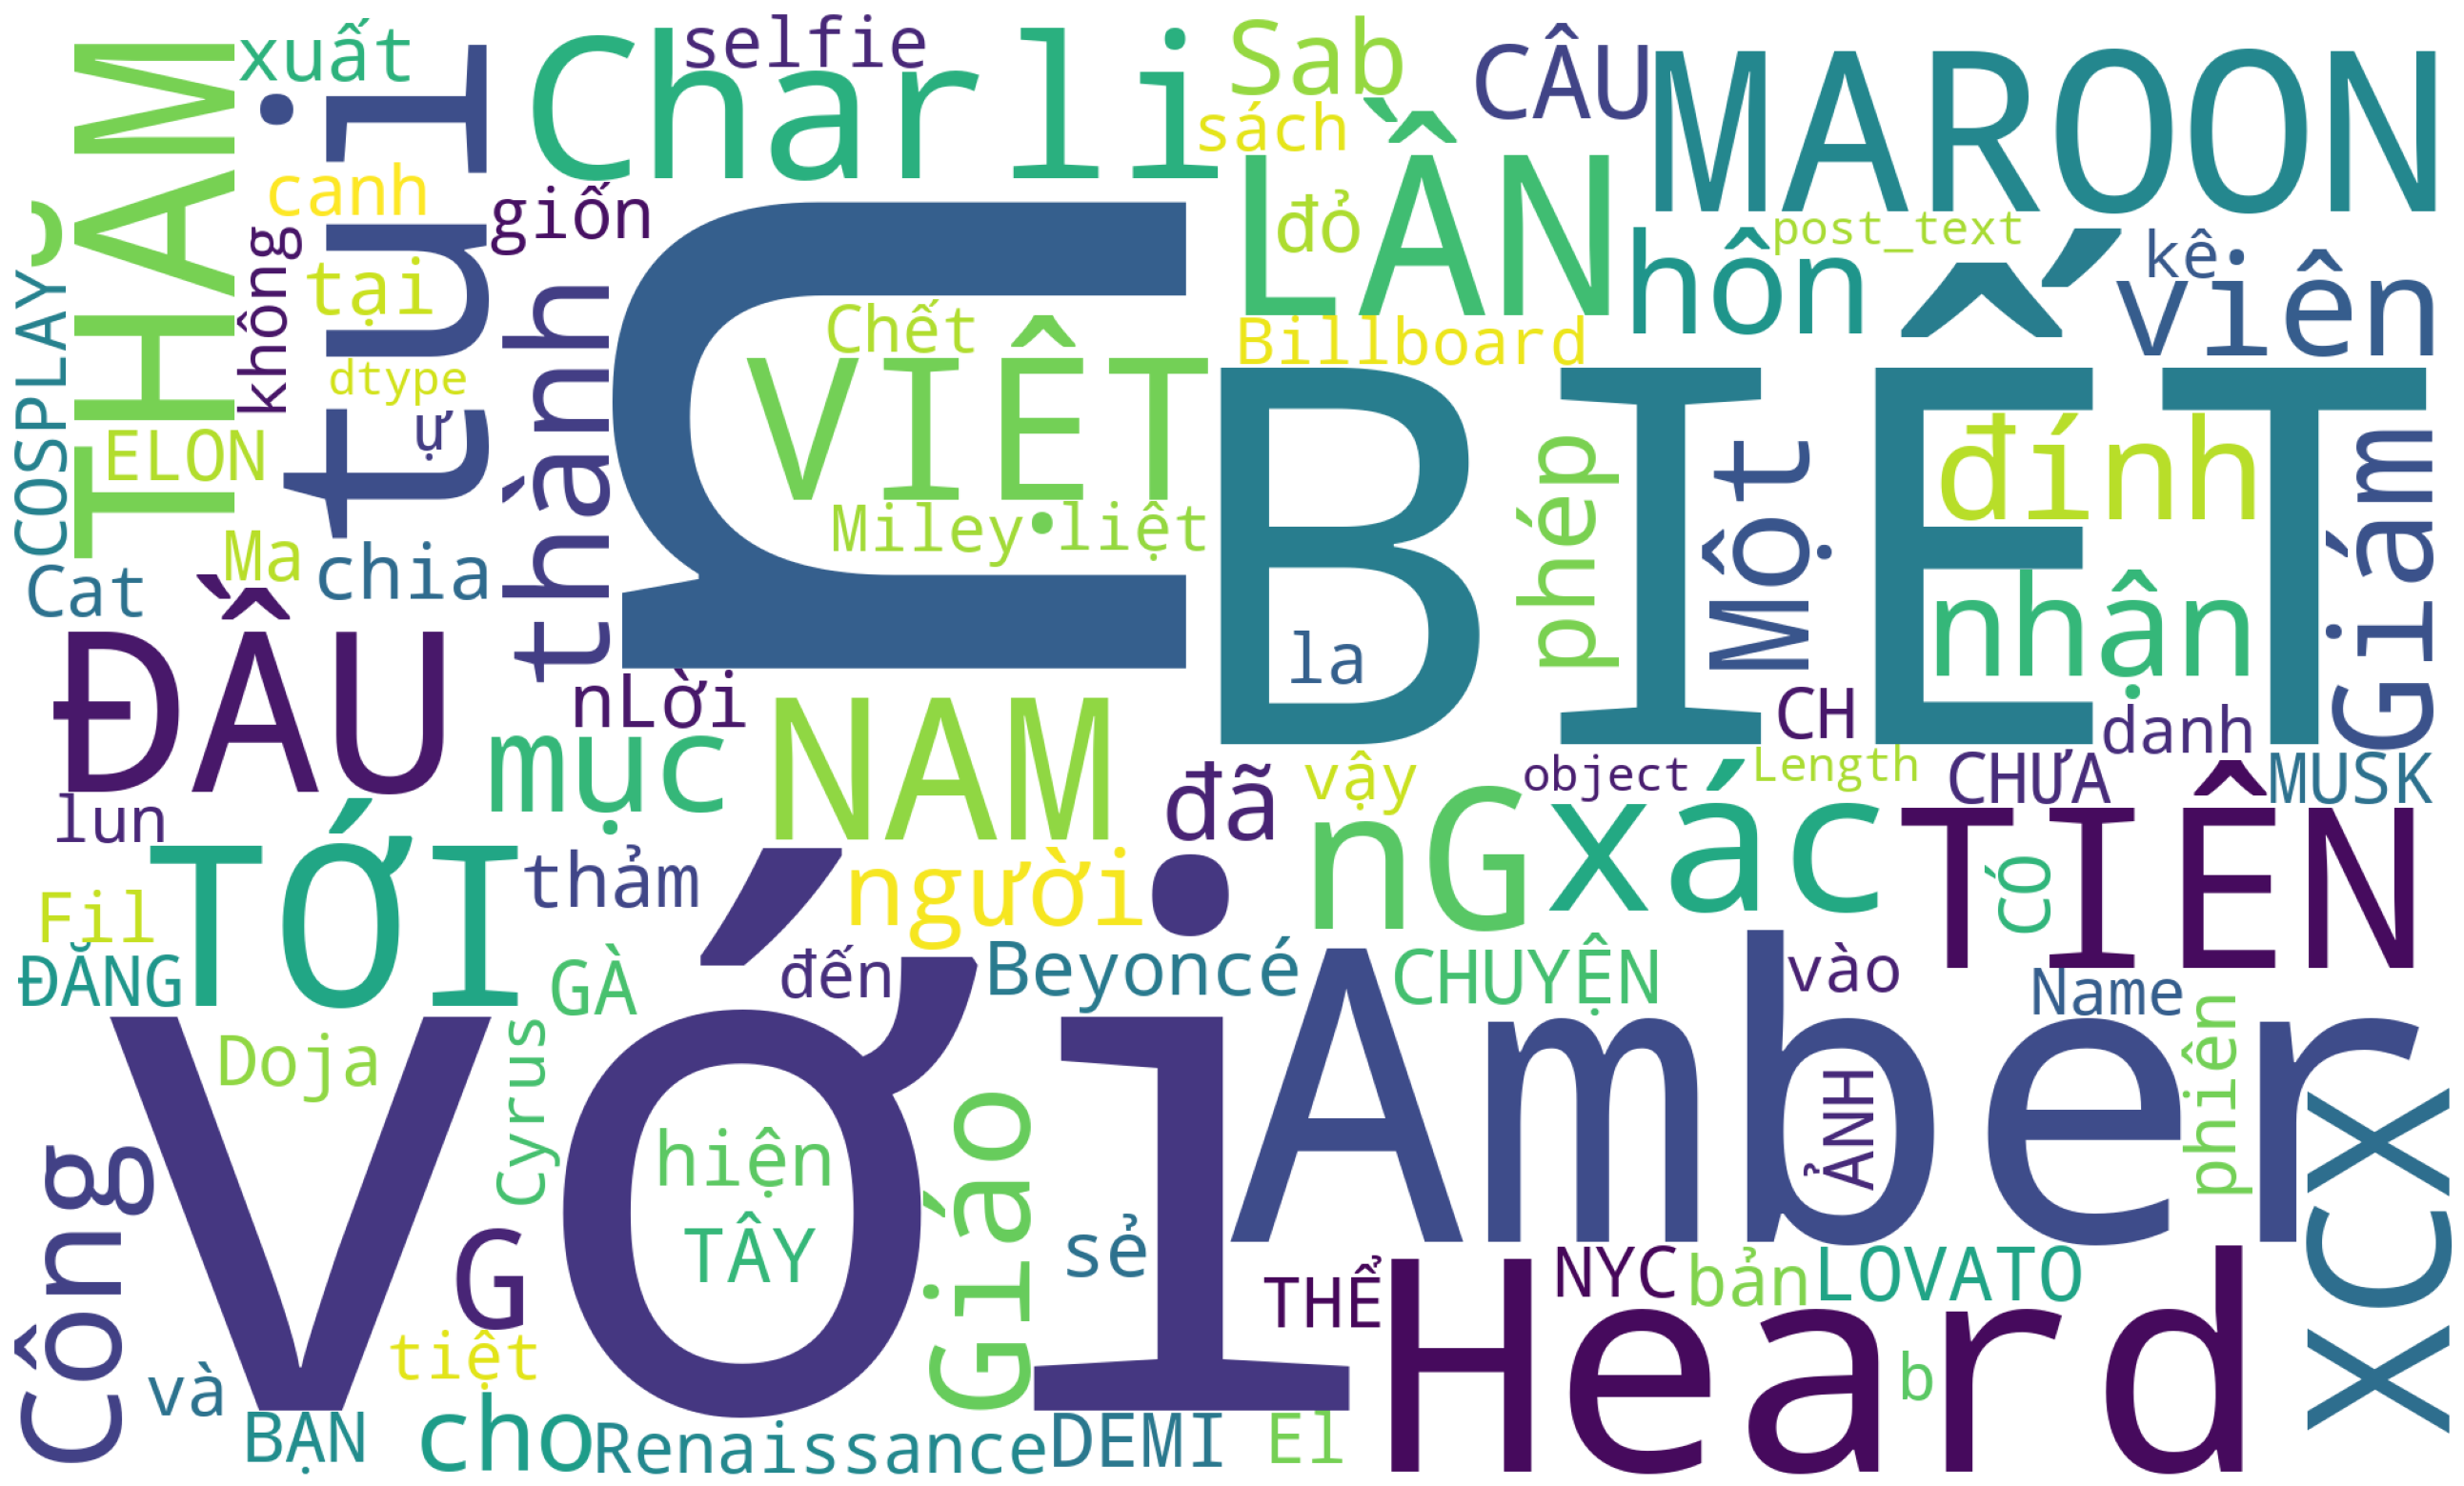

In [29]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Tách thành Dataframe comment

In [30]:
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [31]:
def creatCommentsFrame(df):
    df_result = {"comment_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "post_id" : []}
    
    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [32]:
df_Love_USUK_cmts = creatCommentsFrame(df)

In [33]:
df_Love_USUK_cmts

,comment_id,comment_text,comment_time,post_id
0,368325572427024,Nguyen Tran tập bài này mai mốt đi concert hát...,2023-11-01,747839004050965
1,164619943410211,Lee Bảo tiếc nhóm này t mê từ nhỏ luôn,2023-11-01,747839004050965
2,349814544400991,t đang bực mà gặp m nữa,2023-11-02,747839004050965
3,1022742102141453,=))))),2023-11-01,747839004050965
4,1778924032608803,Sơn Nguyễn lên dần plan thôu,2023-11-02,747839004050965
...,...,...,...,...
1033,744162360805098,Quoạc Quoạc 👌🏻🫡,2023-09-30,704808921687307
1034,844749430370138,HÀNG THẬT,2023-09-30,704808921687307
1035,1351601852098655,Ngân An xạo hã 😡,2023-08-30,704808921687307
1036,269155135985240,Nói nữa Taylor quê bây giờ á :((((,2023-08-30,704808921687307


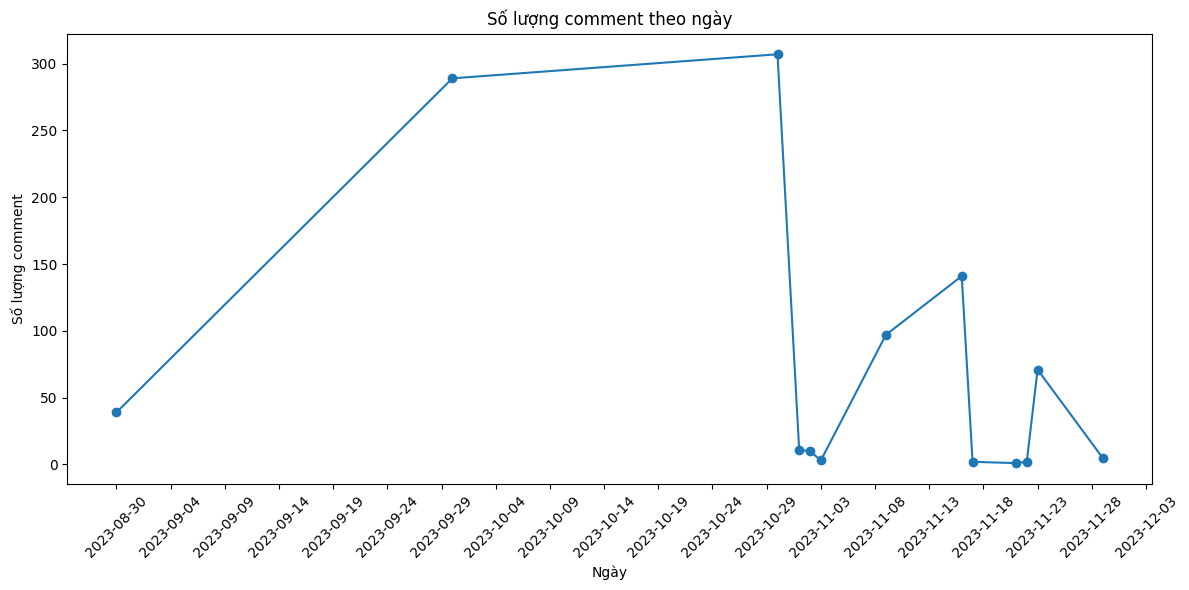

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DayLocator
df_Love_USUK_cmts['comment_time'] = pd.to_datetime(df_Love_USUK_cmts['comment_time'])
comment_counts_by_date = df_Love_USUK_cmts.groupby(df_Love_USUK_cmts['comment_time'].dt.date).size()
plt.figure(figsize=(12, 6))
plt.plot(comment_counts_by_date.index, comment_counts_by_date.values, marker='o', linestyle='-')

plt.xlabel('Ngày')
plt.ylabel('Số lượng comment')
plt.title('Số lượng comment theo ngày')
plt.xticks(rotation=45)
locator = DayLocator(interval=5)
plt.gca().xaxis.set_major_locator(locator)

plt.tight_layout()
plt.show()


In [35]:
com_text = str(df_Love_USUK_cmts['comment_text'])
print(com_text)

0       Nguyen Tran tập bài này mai mốt đi concert hát...
1                  Lee Bảo tiếc nhóm này t mê từ nhỏ luôn
2                                 t đang bực mà gặp m nữa
3                                                  =)))))
4                            Sơn Nguyễn lên dần plan thôu
                              ...                        
1033                                      Quoạc Quoạc 👌🏻🫡
1034                                          HÀNG THẬT
1035                                     Ngân An xạo hã 😡
1036                   Nói nữa Taylor quê bây giờ á :((((
1037                                          Ja Ite bạch
Name: comment_text, Length: 1038, dtype: object


In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud_cleaned = WordCloud(stopwords=STOPWORDS,
                              background_color='white', 
                              max_words=2000,
                              width=5000, height=1800
                             ).generate(com_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud_cleaned)
plt.axis('off')
plt.show()
